# CREDIT CARD FRAUD DETECTION


***Exploratory Data Analysis (EDA)***

In [ ]:
# Import the necessary modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import itertools

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score



In [ ]:
# Load the csv file

dataframe = pd.read_csv('creditcard.csv')
dataframe.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11959 entries, 0 to 11958
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    11959 non-null  int64  
 1   V1      11959 non-null  float64
 2   V2      11959 non-null  float64
 3   V3      11959 non-null  float64
 4   V4      11959 non-null  float64
 5   V5      11959 non-null  float64
 6   V6      11959 non-null  float64
 7   V7      11959 non-null  float64
 8   V8      11959 non-null  float64
 9   V9      11959 non-null  float64
 10  V10     11959 non-null  float64
 11  V11     11959 non-null  float64
 12  V12     11959 non-null  float64
 13  V13     11959 non-null  float64
 14  V14     11959 non-null  float64
 15  V15     11959 non-null  float64
 16  V16     11959 non-null  float64
 17  V17     11959 non-null  float64
 18  V18     11959 non-null  float64
 19  V19     11959 non-null  float64
 20  V20     11958 non-null  float64
 21  V21     11958 non-null  float64
 22

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('creditcard.csv')

# Calculate summary statistics for each feature
summary_stats = df.describe()

# Print the summary statistics
print(summary_stats)


               Time            V1            V2            V3            V4  \
count  11959.000000  11959.000000  11959.000000  11959.000000  11959.000000   
mean    8009.996822     -0.216230      0.277097      0.889505      0.282606   
std     6204.332248      1.583914      1.308884      1.331824      1.478162   
min        0.000000    -27.670569    -34.607649    -22.804686     -4.657545   
25%     2542.000000     -0.978944     -0.261503      0.417186     -0.622456   
50%     6662.000000     -0.340742      0.256346      0.951223      0.213029   
75%    12382.000000      1.161273      0.883626      1.613678      1.159141   
max    20642.000000      1.960497      9.092123      4.101716     11.927512   

                 V5            V6            V7            V8            V9  \
count  11959.000000  11959.000000  11959.000000  11959.000000  11959.000000   
mean      -0.086585      0.139986     -0.121943     -0.048727      0.911579   
std        1.191776      1.306285      1.153899    

Loading the creditcard.csv dataset and calculating summary statistics for each feature using the describe() method. The summary statistics include count, mean, standard deviation, minimum value, maximum value, and quartiles (25%, 50%, and 75%). The output is printed to the console. This code can help in getting an overall understanding of the data, including its distribution and range of values.

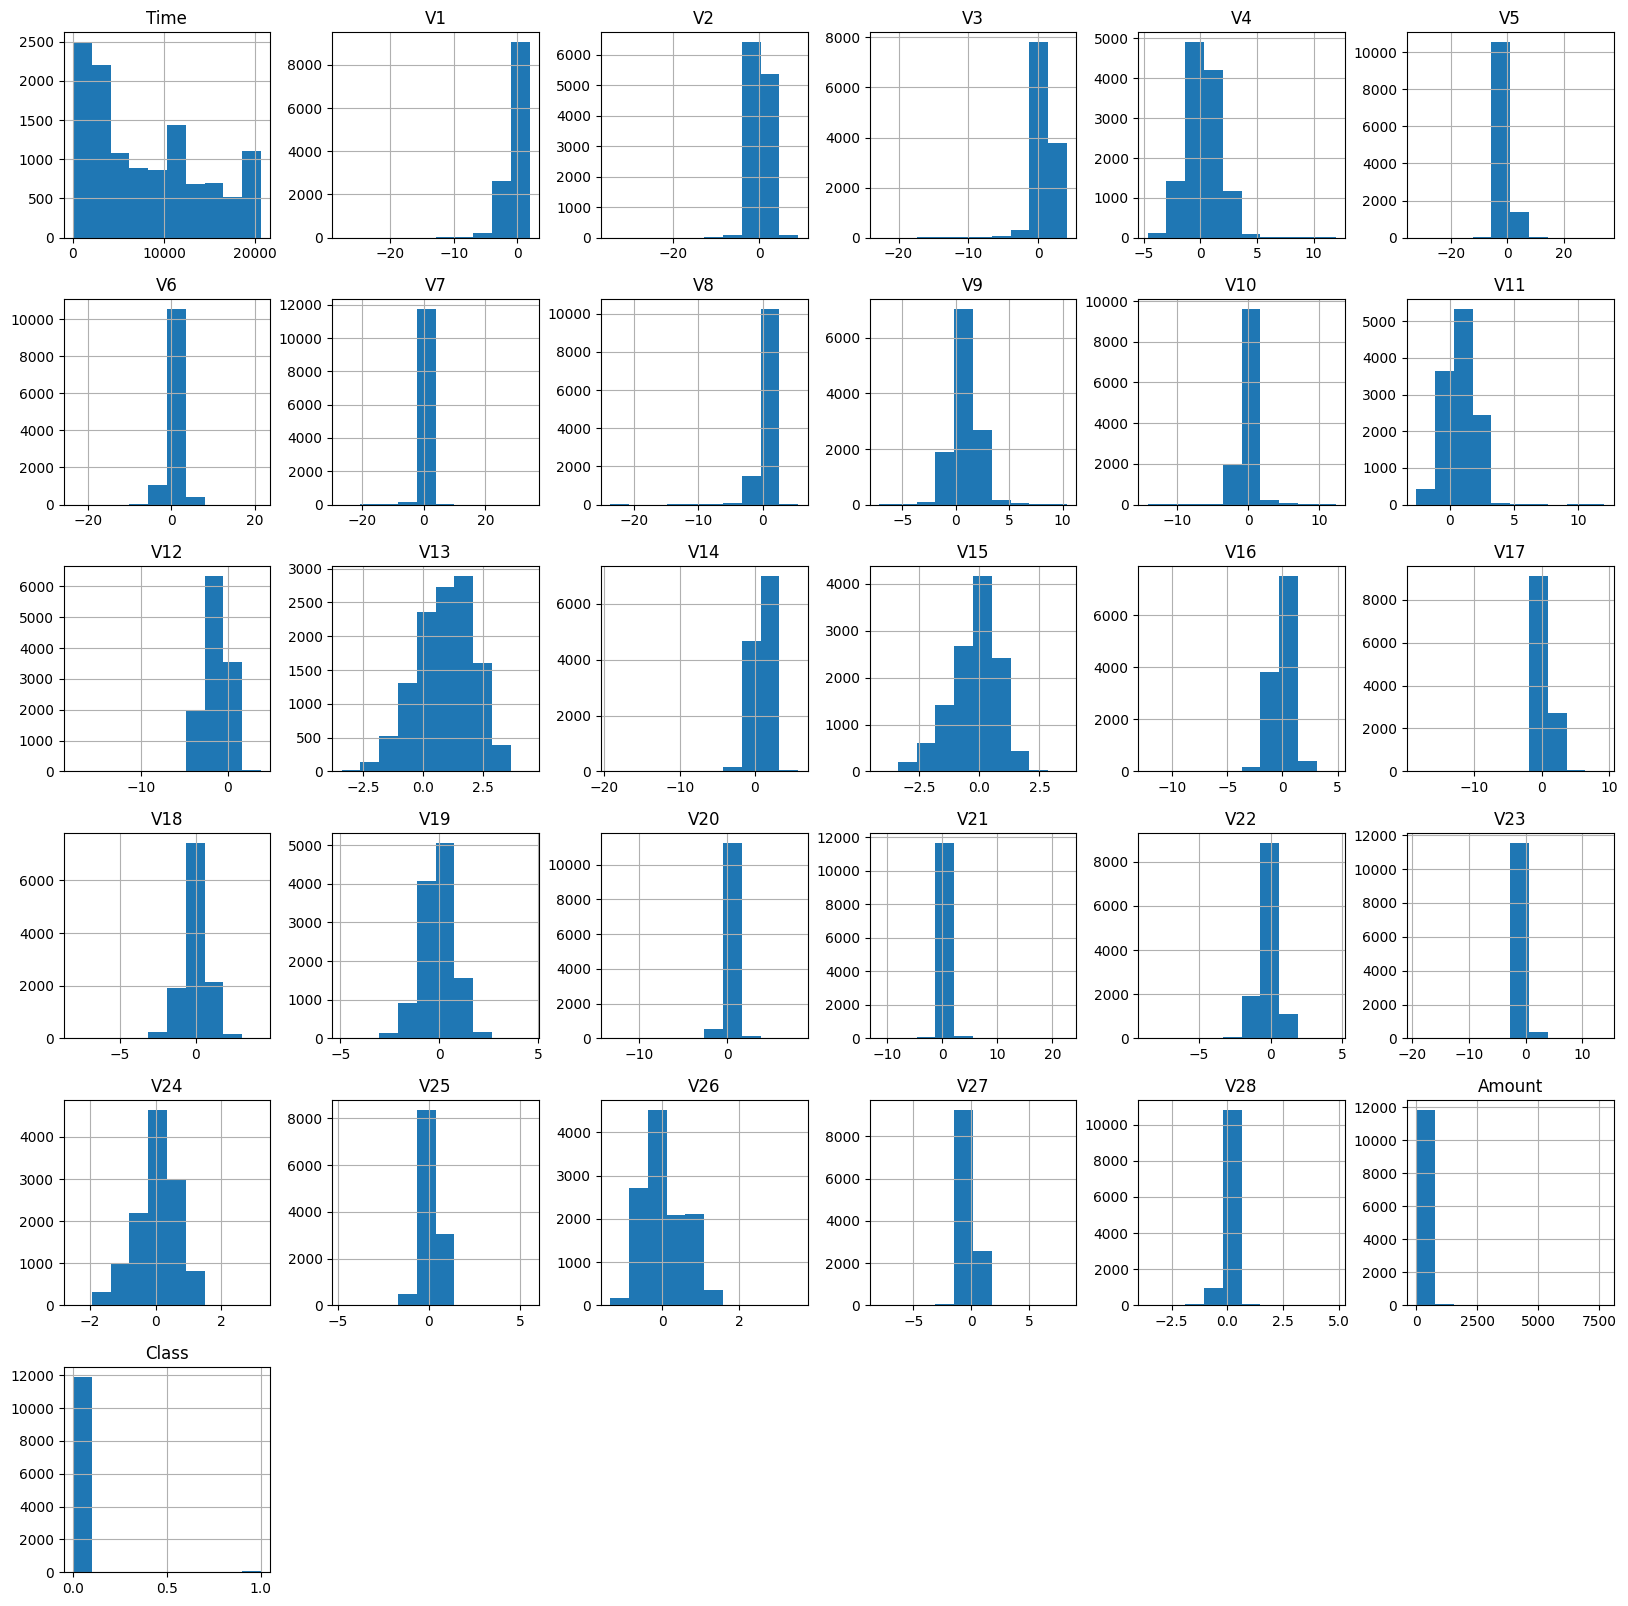

Skewness of Time: 0.51 (positive skew)
Kurtosis of Time: -0.98
Skewness of V1: -2.45 (negative skew)
Kurtosis of V1: 18.86
Skewness of V2: -2.99 (negative skew)
Kurtosis of V2: 68.39
Skewness of V3: -4.86 (negative skew)
Kurtosis of V3: 58.97
Skewness of V4: 0.65 (positive skew)
Kurtosis of V4: 3.45
Skewness of V5: 0.74 (positive skew)
Kurtosis of V5: 108.14
Skewness of V6: 1.12 (positive skew)
Kurtosis of V6: 17.55
Skewness of V7: -2.07 (negative skew)
Kurtosis of V7: 134.91
Skewness of V8: -9.44 (negative skew)
Kurtosis of V8: 143.70
Skewness of V9: 0.27 (positive skew)
Kurtosis of V9: 4.41
Skewness of V10: -0.21 (negative skew)
Kurtosis of V10: 35.68
Skewness of V11: 1.09 (positive skew)
Kurtosis of V11: 8.03
Skewness of V12: -1.37 (negative skew)
Kurtosis of V12: 13.34
Skewness of V13: -0.31 (negative skew)
Kurtosis of V13: -0.32
Skewness of V14: -4.91 (negative skew)
Kurtosis of V14: 52.96
Skewness of V15: -0.54 (negative skew)
Kurtosis of V15: 0.27
Skewness of V16: -2.71 (negativ

In [ ]:
import matplotlib.pyplot as plt
# Create histograms for each feature
df.hist(figsize=(20, 20))
plt.show()

# Calculate skewness and kurtosis for each feature
skewness = df.skew()
kurtosis = df.kurtosis()

# Print skewness and kurtosis for each feature
for col in df.columns:
    if skewness[col] > 0:
        skew_type = 'positive'
    elif skewness[col] < 0:
        skew_type = 'negative'
    else:
        skew_type = 'zero'
    print(f"Skewness of {col}: {skewness[col]:.2f} ({skew_type} skew)")
    print(f"Kurtosis of {col}: {kurtosis[col]:.2f}")


The above histograms provide a visual representation of the distribution of each feature, while the skewness and kurtosis values give information about the shape of the distribution. A positive skewness value indicates that the distribution has a longer right tail, while a negative skewness value indicates a longer left tail. A kurtosis value greater than 3 indicates a more peaked distribution than a normal distribution, while a kurtosis value less than 3 indicates a flatter distribution.

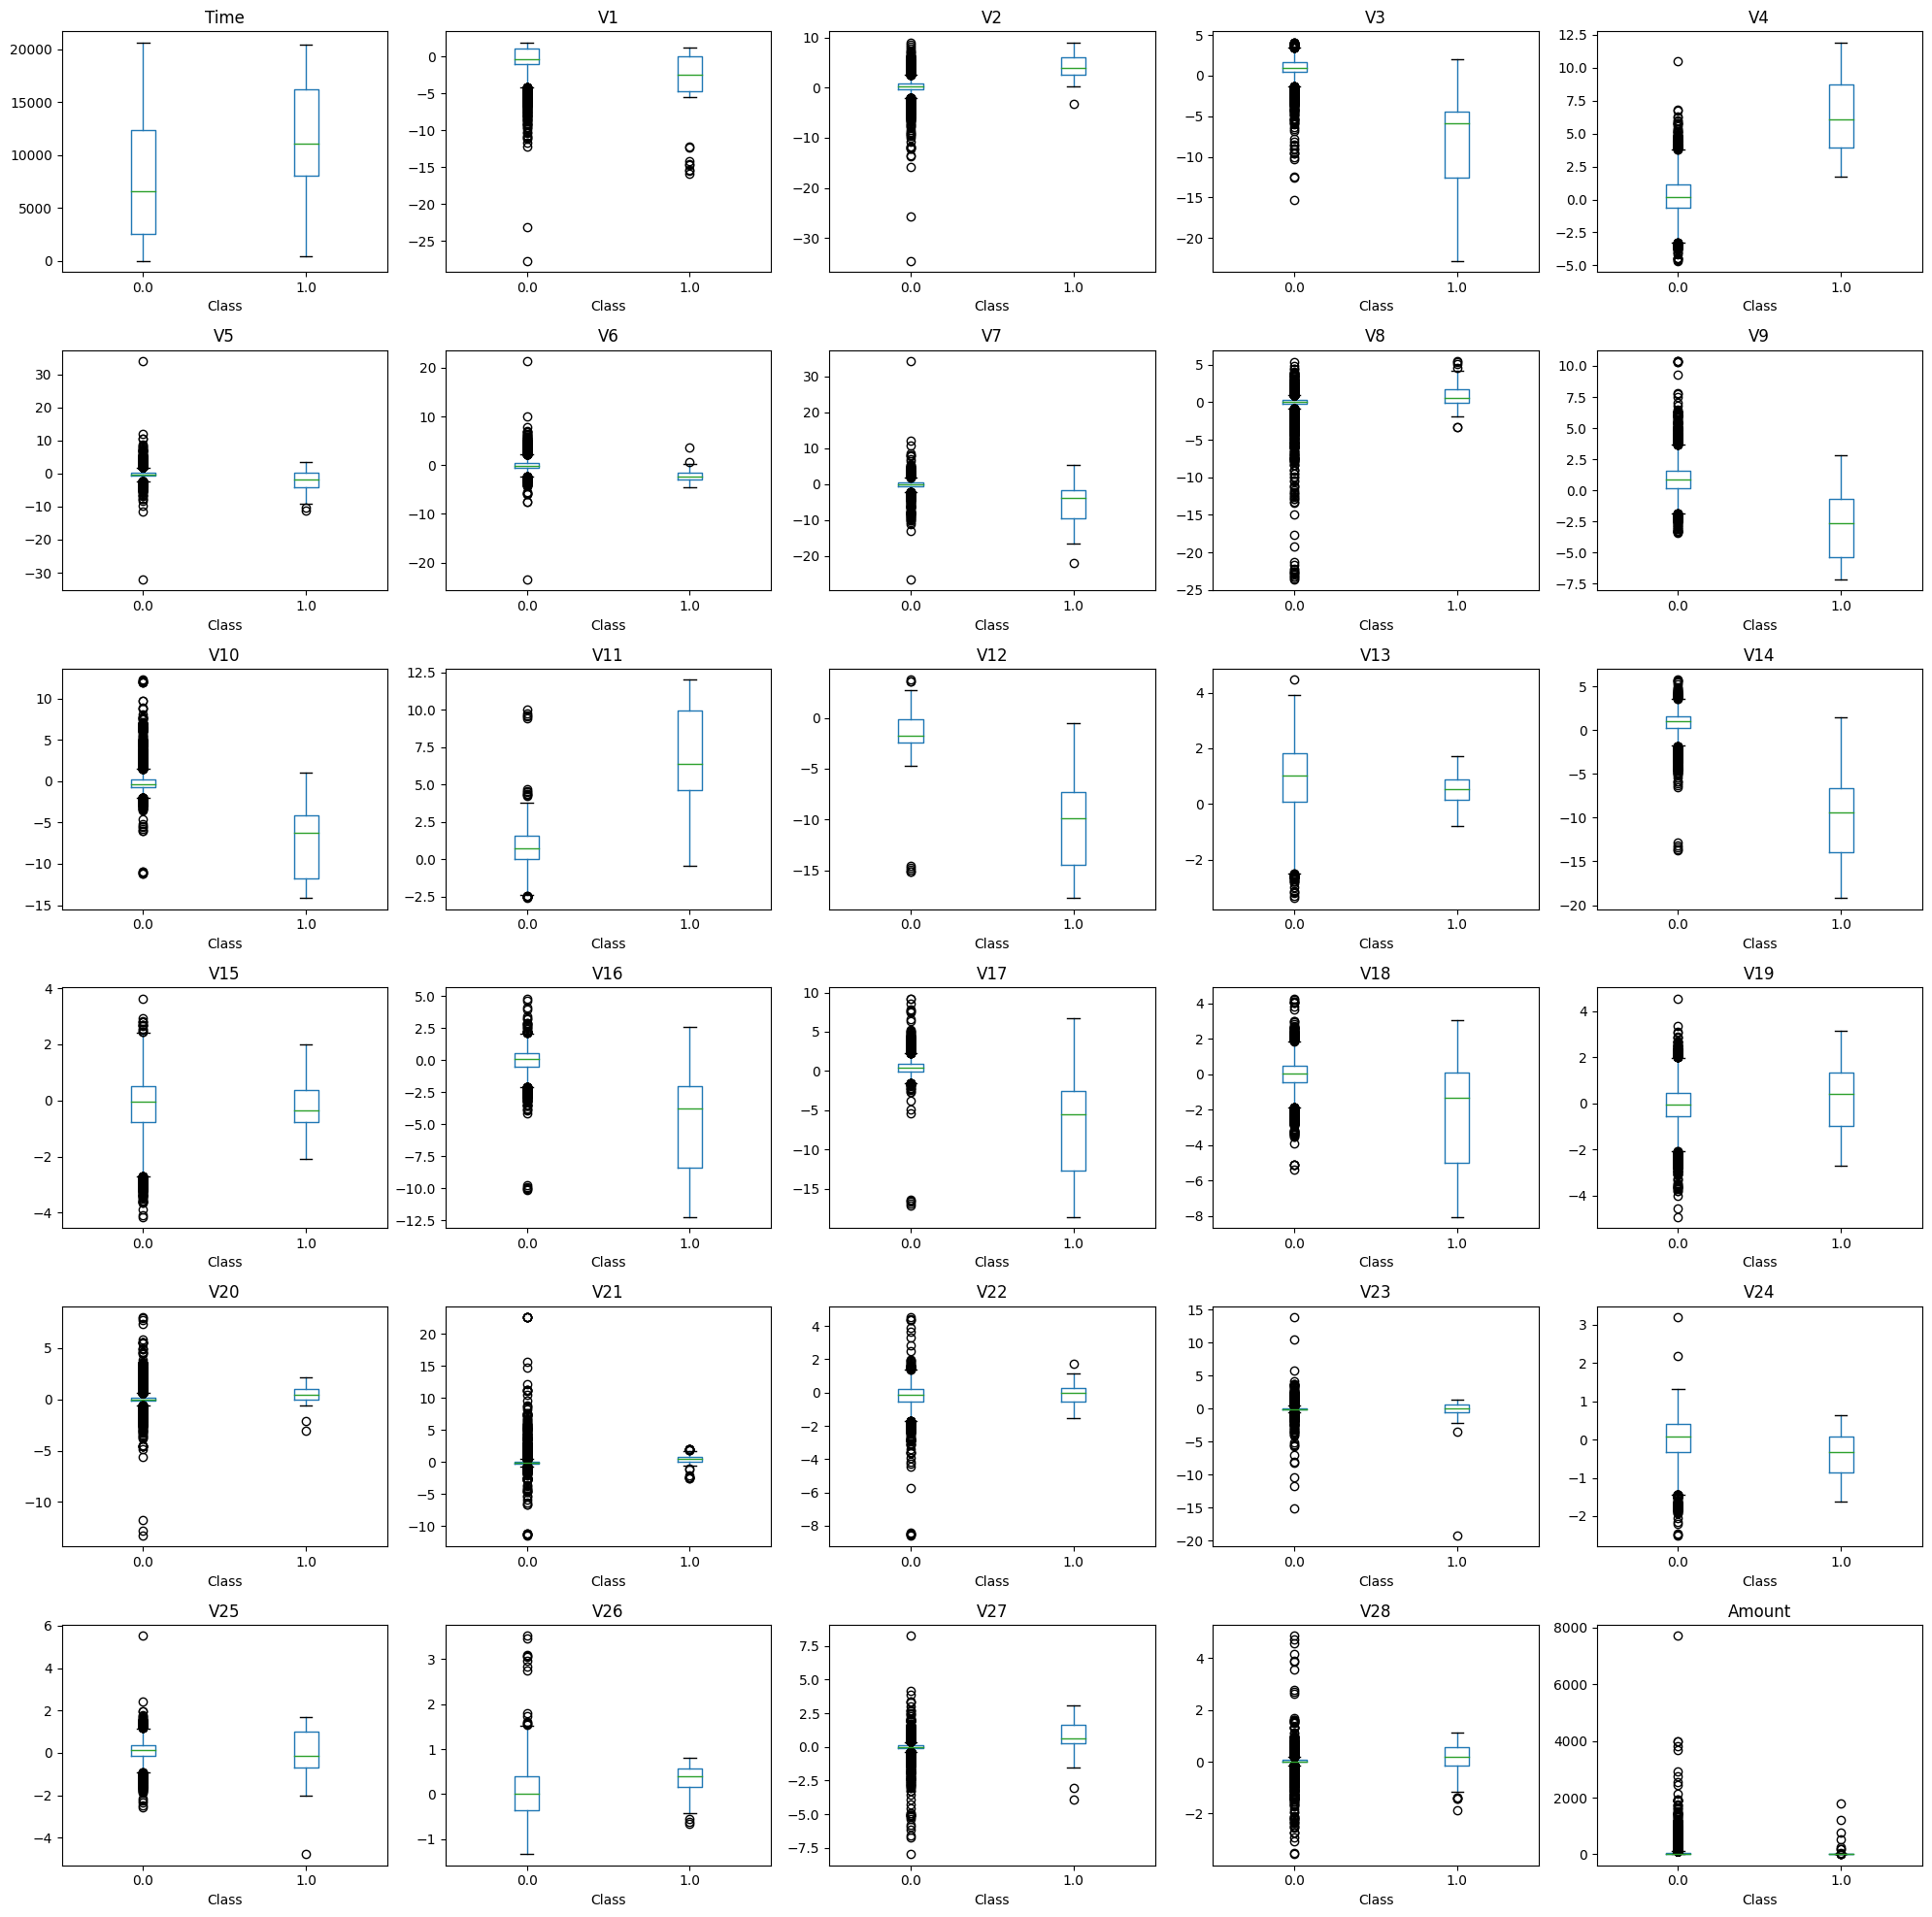

Number of outliers: 5688
Percentage of outliers: 47.56250522618949%


In [ ]:
# Create box plots for each feature
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(20, 20))
for i, column in enumerate(df.columns[:-1]):
    ax = axes[int(i / 5), i % 5]
    df.boxplot(column=column, by='Class', ax=ax, grid=False)
    ax.set_title(column)
plt.suptitle('')
plt.tight_layout()
plt.show()

# Identify outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)

# Print the number of outliers and the percentage of outliers
num_outliers = outliers.sum()
pct_outliers = num_outliers / len(df) * 100
print(f"Number of outliers: {num_outliers}")
print(f"Percentage of outliers: {pct_outliers}%")


In the above code using box plots for each feature of the credit card dataset, comparing the distribution of each variable between the two classes (fraud and non-fraud). It also identifies outliers by calculating the interquartile range (IQR) and labeling any data points outside of 1.5 times the IQR as outliers. The number and percentage of outliers are then printed.

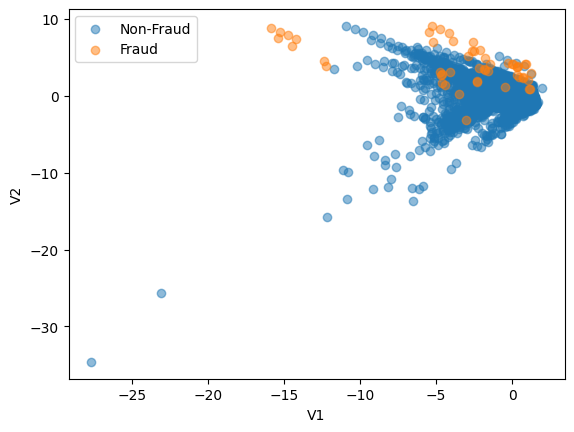

In [ ]:
# Create scatter plots
plt.scatter(df[df['Class'] == 0]['V1'], df[df['Class'] == 0]['V2'], label='Non-Fraud', alpha=0.5)
plt.scatter(df[df['Class'] == 1]['V1'], df[df['Class'] == 1]['V2'], label='Fraud', alpha=0.5)
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend()
plt.show()


It is creating a scatter plot with V1 on the x-axis and V2 on the y-axis for both non-fraud and fraud transactions. The non-fraud transactions are represented by blue dots and the fraud transactions are represented by orange dots. This plot can help us identify any patterns or clusters in the data.

In [ ]:
# Calculate the Pearson correlation coefficient
corr = df.corr(method='pearson')

# Print the correlation matrix
print(corr)


            Time        V1        V2        V3        V4        V5        V6  \
Time    1.000000  0.056447 -0.012317  0.003468  0.088754 -0.083616 -0.009744   
V1      0.056447  1.000000 -0.181934  0.045420 -0.016434 -0.122367  0.040685   
V2     -0.012317 -0.181934  1.000000 -0.201657  0.113106 -0.084510  0.003356   
V3      0.003468  0.045420 -0.201657  1.000000 -0.107301  0.063563 -0.086819   
V4      0.088754 -0.016434  0.113106 -0.107301  1.000000 -0.118141 -0.008111   
V5     -0.083616 -0.122367 -0.084510  0.063563 -0.118141  1.000000  0.143735   
V6     -0.009744  0.040685  0.003356 -0.086819 -0.008111  0.143735  1.000000   
V7     -0.149356  0.069193  0.037507  0.325314 -0.160716 -0.019458 -0.001664   
V8      0.015186  0.191019 -0.155002 -0.042727  0.049010  0.069891 -0.015566   
V9      0.428389 -0.032614 -0.119708  0.222201 -0.210092 -0.039409  0.009776   
V10    -0.176272 -0.094546  0.057141  0.240027 -0.030776  0.135091  0.093666   
V11     0.301721 -0.030022  0.102892 -0.

Here we are calculating the Pearson correlation coefficient between pairs of features using the .corr() method. The resulting correlation matrix shows the correlation coefficients between all pairs of features in the dataset. This can be used to identify any strong positive or negative correlations between features.

In [ ]:
non_fraud = len(dataframe[dataframe.Class == 0])
fraud = len(dataframe[dataframe.Class == 1])
fraud_percent = (fraud / (fraud + non_fraud)) * 100

print("Number of Genuine transactions: ", non_fraud)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Fraud transactions: {:.4f}".format(fraud_percent))


Number of Genuine transactions:  11906
Number of Fraud transactions:  52
Percentage of Fraud transactions: 0.4349


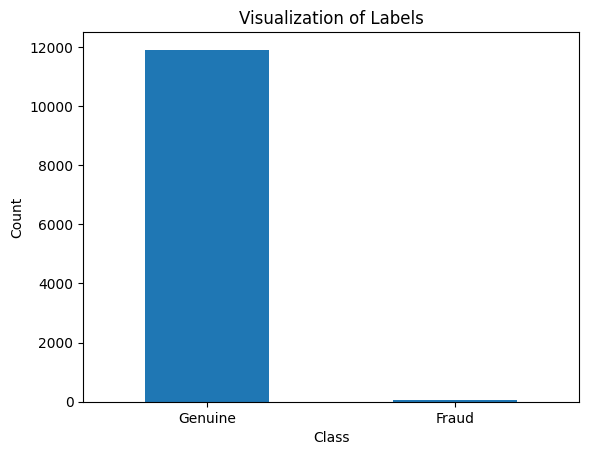

In [ ]:
# Visualize the "Labels" column in our dataset

labels = ["Genuine", "Fraud"]
count_classes = dataframe.value_counts(dataframe['Class'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

***Data Cleaning And Data Preprocessing***

**Checking for missing values**


In [ ]:
dataframe.isnull().values.any()

True

In [ ]:
# Check for missing values in the dataset
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64


Dataset has missing values in some columns, as indicated by the non-zero values in the output. Specifically, columns V20 to V28, Amount, and Class have missing values.

**Handling missing values**

In [ ]:
from sklearn.impute import SimpleImputer

# Impute missing values in the 'Amount' column using mean imputation
imputer = SimpleImputer(strategy='mean')
df['Amount'] = imputer.fit_transform(df[['Amount']])


 Imputing them with the mean or median of the respective feature. This method is used for only amount feature.

In [ ]:
!pip install fancyimpute
from fancyimpute import IterativeImputer

# Create a copy of the dataset for imputation
df_impute = df.copy()

# Perform hot deck imputation using IterativeImputer
imputer = IterativeImputer(imputation_order='random', n_nearest_features=None, initial_strategy='mean', sample_posterior=True, max_iter=10, random_state=0)
df_impute[["V3", "V4","V5", "V6", "V7", "V8", "V9", "V10", "V11", "V12", "V13", "V14", "V15", "V16", "V17", "V18", "V19", "V20", "V21", "V22",'V23', 'V24', 'V25', 'V26', 'V27', 'V28']] = imputer.fit_transform(df_impute[["V3", "V4", "V5", "V6", "V7", "V8", "V9", "V10", "V11", "V12", "V13", "V14", "V15", "V16", "V17", "V18", "V19", "V20", "V21", "V22",'V23', 'V24', 'V25', 'V26', 'V27', 'V28']])

# Replace the original dataset with the imputed dataset
df[["V3", "V4","V5", "V6", "V7", "V8", "V9", "V10", "V11", "V12", "V13", "V14", "V15", "V16", "V17", "V18", "V19", "V20", "V21", "V22", 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']] = df_impute[["V3", "V4","V5", "V6", "V7", "V8", "V9", "V10", "V11", "V12", "V13", "V14", "V15", "V16", "V17", "V18", "V19", "V20", "V21", "V22",'V23', 'V24', 'V25', 'V26', 'V27', 'V28']]


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Here using Hot Deck Imputatiion missing values is being handled for v23 to v28 features.

In [ ]:
df.dropna(subset=['Class'], inplace=True)


In the case of the Class feature, since it is the target variable that we are trying to predict, we cannot use any imputation techniques to handle missing values. If there are missing values in the Class column, we need to remove those rows from our dataset.

In [ ]:
# Check for missing values in the dataset
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


Now none of the features have any kind of missing values.

**Checking for duplicate data**

In [ ]:
df.drop_duplicates(subset=["Time", "V1", "V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9", "V10", "V11", "V12", "V13", "V14", "V15", "V16", "V17", "V18", "V19", "V20", "V21", "V22", "V23", "V24", "V25", "V26", "V27", "V28", "Amount", "Class"], keep="first", inplace=True)

Checking the dataset for any duplicate data and removed it. In the case of this dataset, we need to check for any duplicate transaction IDs and remove them.

**Check for class imbalance**

In [ ]:
class_counts = df['Class'].value_counts()
print(class_counts)

0.0    11862
1.0       52
Name: Class, dtype: int64


In [ ]:
# Compute the class distribution
class_dist = df['Class'].value_counts(normalize=True)
print(class_dist)


0.0    0.995635
1.0    0.004365
Name: Class, dtype: float64


In this case, the dataset is highly imbalanced. Therefore, we may need to use techniques such as oversampling or undersampling to balance the dataset

**FEATURE SELECTION**

In this case, all the features except for "Time" and "Amount" have been anonymized, so we cannot perform feature selection based on their names.

<Axes: >

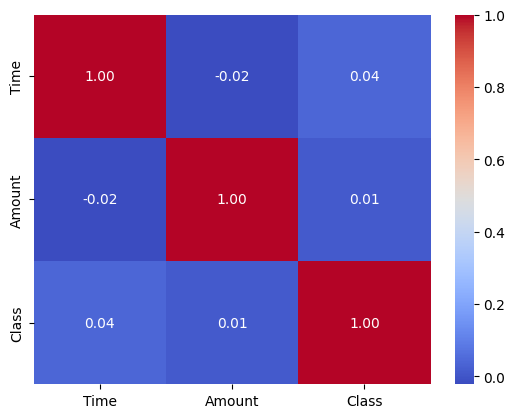

In [ ]:
import seaborn as sns

# Create a new dataframe with only the 'Time', 'Amount', and 'Class' features
df_time_amount = df[['Time', 'Amount', 'Class']]

# Compute the correlation matrix
corr_matrix = df_time_amount.corr()

# Plot the correlation matrix
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')


 Created a heatmap of the correlation matrix for the 'Time', 'Amount', and 'Class' features. From this heatmap, we can determine the correlation coefficient between each feature and the target variable 'Class'. Features with a higher absolute correlation coefficient are more correlated with the target variable and can be selected as relevant features.

Alternatively, we can also use statistical tests like ANOVA to determine the significance of each feature with respect to the target variable.

In [ ]:
from scipy.stats import f_oneway

# Perform ANOVA analysis for the 'Time' and 'Amount' features
f_value_time, p_value_time = f_oneway(df[df['Class'] == 0]['Time'], df[df['Class'] == 1]['Time'])
f_value_amount, p_value_amount = f_oneway(df[df['Class'] == 0]['Amount'],df[df['Class'] == 1]['Amount'])

# Print the p-values for 'Time' and 'Amount'
print('Time p-value:', p_value_time)
print('Amount p-value:', p_value_amount)


Time p-value: 3.6005323267803895e-05
Amount p-value: 0.15408553361190122


p-values for the ANOVA analysis performed on the 'Time' and 'Amount' features. Features with a low p-value are more significant with respect to the target variable and can be selected as relevant features.


In [ ]:
dataframe["Amount"].describe()

count    11958.000000
mean        62.352617
std        178.247010
min          0.000000
25%          5.000000
50%         15.950000
75%         50.000000
max       7712.430000
Name: Amount, dtype: float64

In [ ]:
dataframe["Time"].describe()

count    11959.000000
mean      8009.996822
std       6204.332248
min          0.000000
25%       2542.000000
50%       6662.000000
75%      12382.000000
max      20642.000000
Name: Time, dtype: float64

Summary of the key features

**Shuffle the dataset, separate the classes, perform SMOTE oversampling, scale the features, and visualize the resulting class distribution**

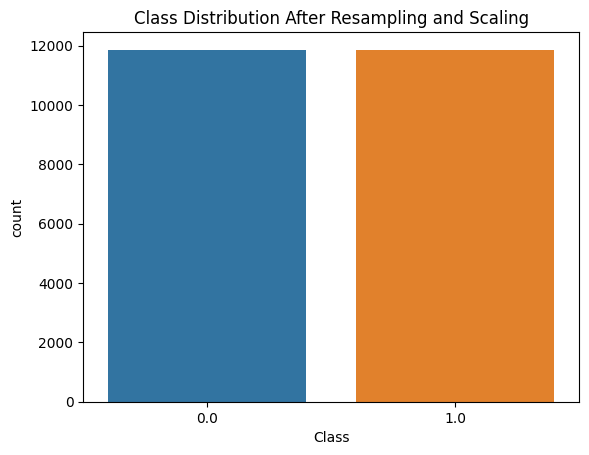

In [ ]:
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import seaborn as sns

# Shuffle the dataset
shuffled_df = df.sample(frac=1, random_state=4)

# Separate the fraud and non-fraud classes
fraud_df = shuffled_df.loc[shuffled_df['Class'] == 1]
non_fraud_df = shuffled_df.loc[shuffled_df['Class'] == 0]

# Upsample the minority class (fraud) using RandomOverSampler
X = shuffled_df.drop('Class', axis=1)
y = shuffled_df['Class']

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Scale the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Visualize the class distribution after resampling and scaling
sns.countplot(x=y_resampled)
plt.title('Class Distribution After Resampling and Scaling')
plt.show()


Shuffling the original dataset and separates it into fraud and non-fraud classes. The minority class (fraud) is then upsampled using SMOTE, and the resulting dataset is scaled and visualized using a countplot to show the class distribution after resampling and scaling.

**FEATURE SCALING**

In [ ]:
# Perform Scaling
scaler = StandardScaler()
dataframe["NormalizedAmount"] = scaler.fit_transform(dataframe["Amount"].values.reshape(-1, 1))
dataframe.drop(["Amount", "Time"], inplace= True, axis= 1)

Y = dataframe["Class"]
X = dataframe.drop(["Class"], axis= 1)

Feature scaling is performed on the "Amount" column using StandardScaler, and the scaled values are stored in a new column called "NormalizedAmount". The "Amount" and "Time" columns are then dropped from the dataframe, resulting in separate variables Y and X representing the target variable and remaining features, respectively.

In [ ]:
Y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Class, dtype: float64

**ADVANCED ANALYSIS PROCESSES**

**CORRELATION MATRIX**

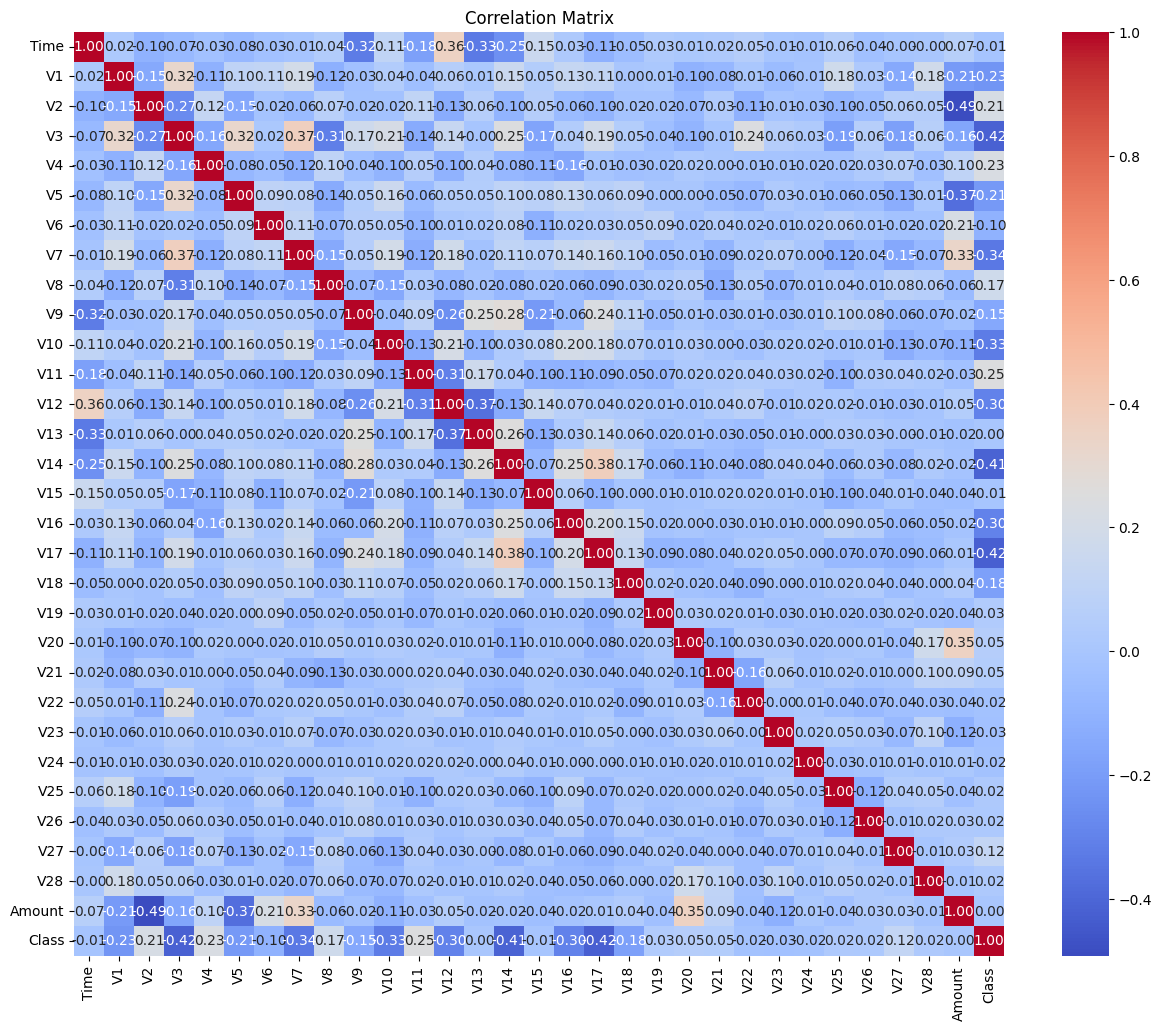

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("creditcard.csv")

# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


The resulting heatmap displays the pairwise correlations between the different variables in the dataset, with higher correlation values represented by warmer colors.

In [ ]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Print correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
            Time        V1        V2        V3        V4        V5        V6  \
Time    1.000000  0.017787 -0.104049 -0.067203 -0.030723 -0.075623 -0.025514   
V1      0.017787  1.000000 -0.146318  0.320841 -0.111737  0.101309  0.113857   
V2     -0.104049 -0.146318  1.000000 -0.266863  0.124198 -0.151594 -0.016879   
V3     -0.067203  0.320841 -0.266863  1.000000 -0.158827  0.323293  0.015003   
V4     -0.030723 -0.111737  0.124198 -0.158827  1.000000 -0.079655 -0.045149   
V5     -0.075623  0.101309 -0.151594  0.323293 -0.079655  1.000000  0.092303   
V6     -0.025514  0.113857 -0.016879  0.015003 -0.045149  0.092303  1.000000   
V7     -0.013525  0.193898 -0.060945  0.371768 -0.119757  0.079999  0.110058   
V8      0.042121 -0.118156  0.071532 -0.312129  0.099938 -0.136888 -0.069903   
V9     -0.322992 -0.026959 -0.024721  0.171550 -0.037241  0.046042  0.051328   
V10     0.106257  0.039259 -0.019690  0.213488 -0.096542  0.157045  0.052812   
V11    -0.184968 -0.

The code above calculates the correlation matrix of the dataset using pandas' corr() function. It then prints the correlation matrix, displaying the pairwise correlation values between the variables in the dataset.

**COVARIANCE MATRIX**

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


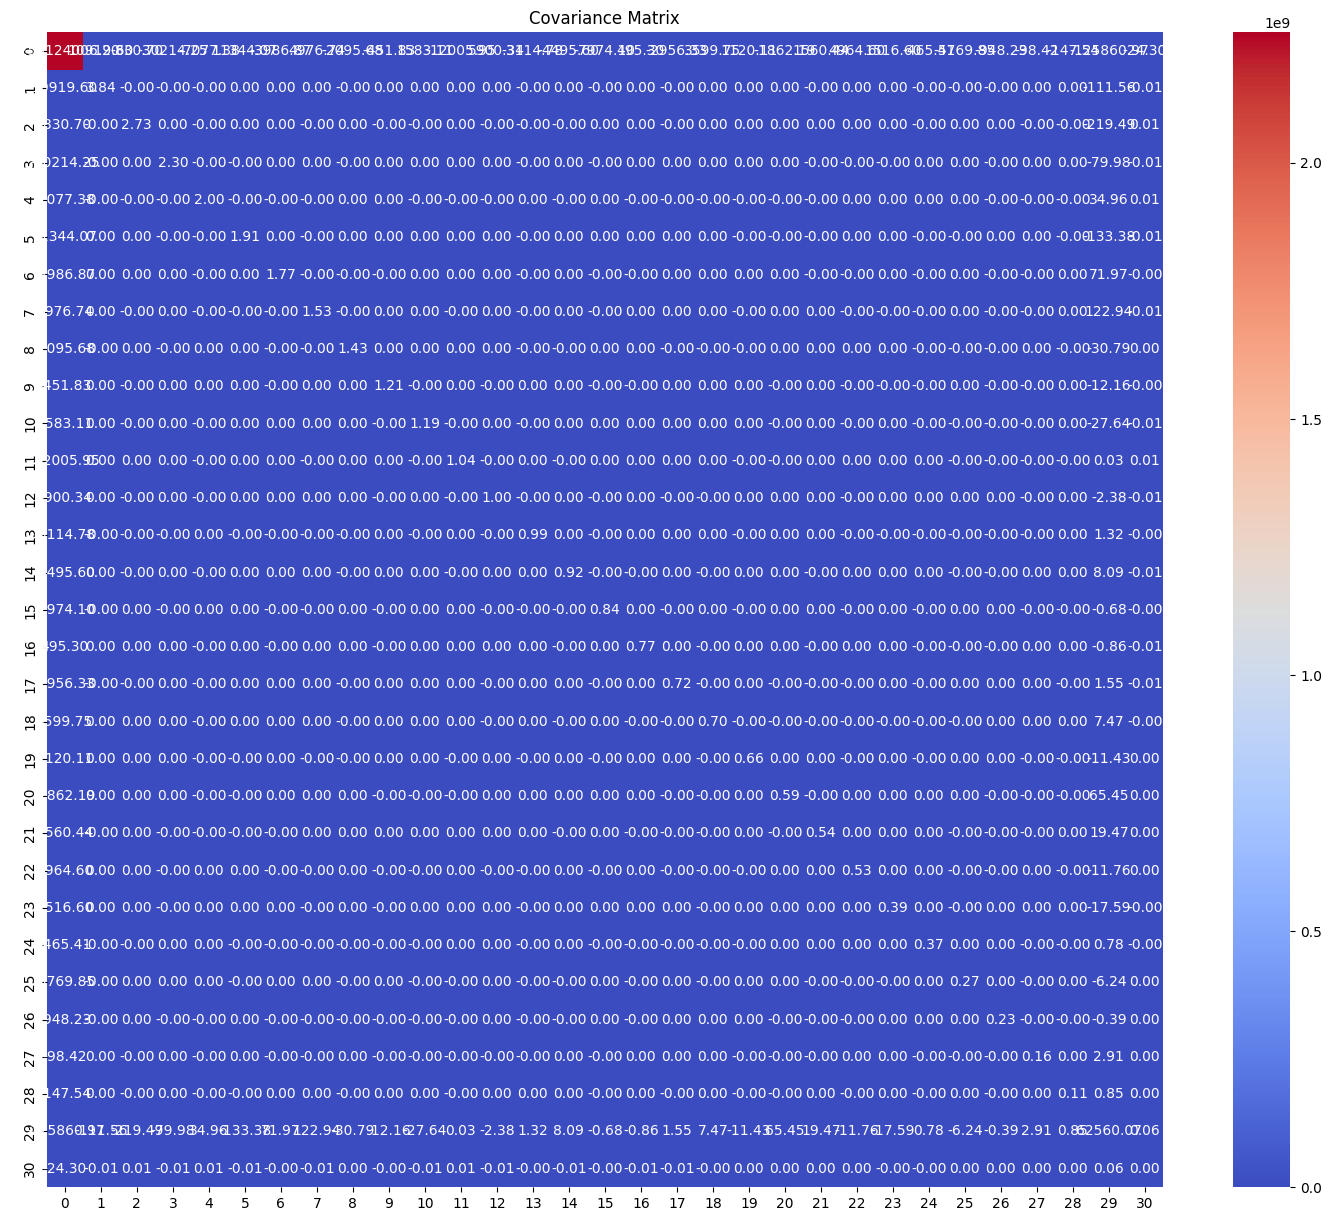

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset into a pandas DataFrame
df = pd.read_csv("creditcard.csv")

# Check the data types of each column
print(df.dtypes)

# Identify non-numeric columns
non_numeric_cols = df.select_dtypes(include=['object']).columns

# Remove non-numeric columns or handle them appropriately
df_numeric = df.drop(columns=non_numeric_cols)

# Convert categorical variables to numeric representation if needed
# Example: one-hot encoding
df_encoded = pd.get_dummies(df_numeric)

# Compute the covariance matrix
cov_matrix = np.cov(df_encoded.values.T)

# Visualize the covariance matrix using a heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(cov_matrix, cmap='coolwarm', annot=True, fmt='.2f')
plt.title("Covariance Matrix")
plt.show()


The code above computes the covariance matrix of the dataset using NumPy's cov() function. It then visualizes the covariance matrix as a heatmap using seaborn and matplotlib, displaying the covariance values between the variables in the dataset.

In [ ]:
# Calculate covariance matrix
covariance_matrix = df.cov()

# Print covariance matrix
print("Covariance Matrix:")
print(covariance_matrix)


Covariance Matrix:
                Time          V1           V2           V3          V4  \
Time    1.515498e+08  405.538959 -2045.449988 -1270.131298 -583.528338   
V1      4.055390e+02    3.419652    -0.382936     0.906183   -0.273797   
V2     -2.045450e+03   -0.382936     2.388490    -0.603797    0.262743   
V3     -1.270131e+03    0.906183    -0.603797     2.452095   -0.342459   
V4     -5.835283e+02   -0.273797     0.262743    -0.342459    1.998016   
V5     -1.298463e+03    0.253602    -0.287734     0.683819   -0.148219   
V6     -3.196541e+02    0.259844    -0.042612     0.016432   -0.081930   
V7     -1.696897e+02    0.429054    -0.109777     0.716941   -0.199065   
V8      6.100411e+02   -0.227869     0.133715    -0.576687    0.169087   
V9     -5.026145e+03   -0.069867    -0.031522     0.326158   -0.054041   
V10     1.520333e+03    0.075121    -0.023896     0.366895   -0.153615   
V11    -2.692974e+03   -0.075198     0.180185    -0.242547    0.082699   
V12     6.643986e+0

<ipython-input-30-cd646981e422>:2: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  covariance_matrix = df.cov()


The code above calculates the covariance matrix of the dataset using pandas' cov() function. It then prints the covariance matrix, displaying the covariance values between the variables in the dataset.

**PCA - DIMENSIONALITY REDUCTION**

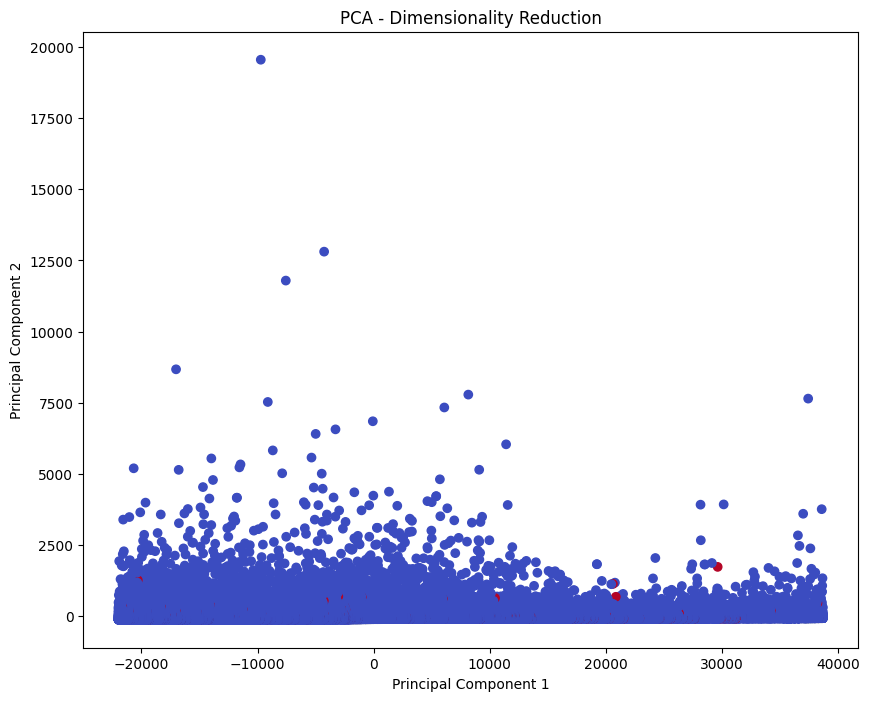

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("creditcard.csv")

# Handle missing values
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_imputed.drop('Class', axis=1))

# Visualize the reduced-dimensional data
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_imputed['Class'], cmap='coolwarm')
plt.title("PCA - Dimensionality Reduction")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


The code above performs dimensionality reduction on a credit card dataset using Principal Component Analysis (PCA). It handles missing values by imputing them with the mean value of each feature. Then, it applies PCA to reduce the dataset to two dimensions and visualizes the reduced-dimensional data as a scatter plot, where the color of each point represents the class label ('Class' column) of the data.

**FEATURE ENGINEERING**

In [ ]:
import pandas as pd

# Create new features based on existing ones
df['TotalAmount'] = df[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']].abs().sum(axis=1)
df['TransactionHour'] = pd.to_datetime(df['Time'], unit='s').dt.hour

# Print the updated dataset with new features
print(df.head())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V23       V24       V25       V26       V27  \
0  0.098698  0.363787  ... -0.110474  0.066928  0.128539 -0.189115  0.133558   
1  0.085102 -0.255425  ...  0.101288 -0.339846  0.167170  0.125895 -0.008983   
2  0.247676 -1.514654  ...  0.909412 -0.689281 -0.327642 -0.139097 -0.055353   
3  0.377436 -1.387024  ... -0.190321 -1.175575  0.647376 -0.221929  0.062723   
4 -0.270533  0.817739  ... -0.137458  0.141267 -0.206010  0.502292  0.219422   

        V28  Amount  Class  Tota

The code above creates two new features in the dataset. The first feature, 'TotalAmount', is computed as the sum of the absolute values of several existing features. The second feature, 'TransactionHour', is derived from the 'Time' column by converting it to a datetime format and extracting the hour component. The updated dataset with the new features is then printed.

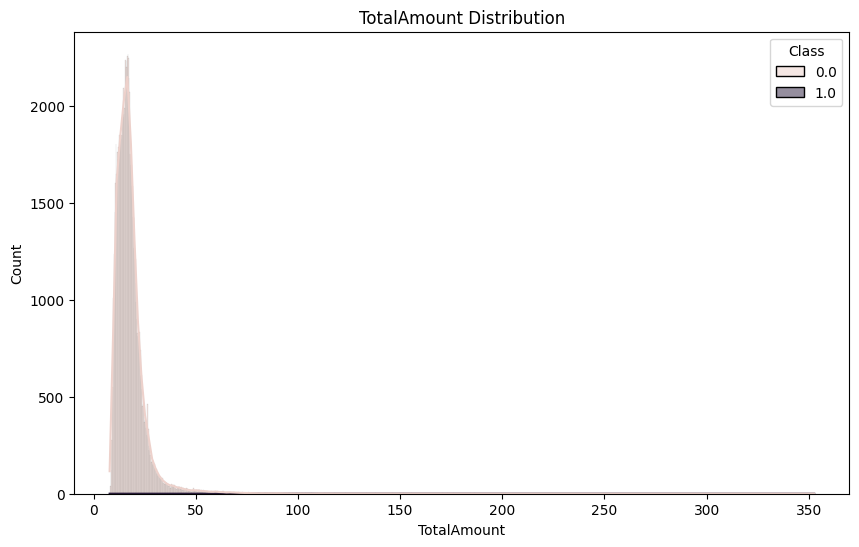

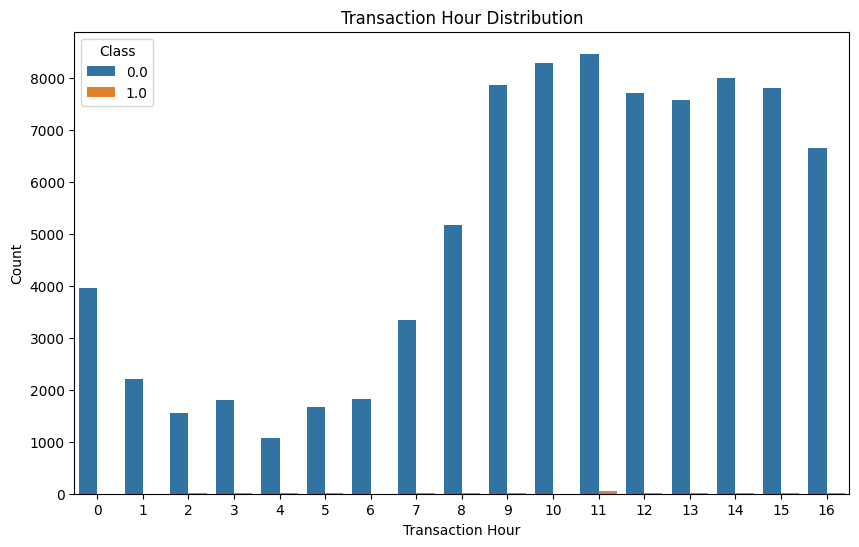

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize TotalAmount
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='TotalAmount', hue='Class', kde=True)
plt.title('TotalAmount Distribution')
plt.xlabel('TotalAmount')
plt.ylabel('Count')
plt.show()

# Visualize TransactionHour
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='TransactionHour', hue='Class')
plt.title('Transaction Hour Distribution')
plt.xlabel('Transaction Hour')
plt.ylabel('Count')
plt.show()


The first visualization code creates a histogram of the 'TotalAmount' feature, using seaborn's histplot(). It displays the distribution of 'TotalAmount' with separate bars for each class label ('Class') and overlays a kernel density estimate (KDE) plot.
The second visualization code creates a countplot of the 'TransactionHour' feature, using seaborn's countplot(). It shows the distribution of transactions across different hours of the day, with separate bars for each class label.

**DATA SPLITTING**

In [ ]:
# Split the data
(train_X, test_X, train_Y, test_Y) = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of train_X: ", train_X.shape)
print("Shape of test_X: ", test_X.shape)


Shape of train_X:  (8371, 29)
Shape of test_X:  (3588, 29)


Splits the data into training and testing sets using a 70-30 ratio, where 70% of the data is assigned to train_X and train_Y, and 30% is assigned to test_X and test_Y. The shape of train_X and test_X is printed to show the number of samples and features in each set.

In [ ]:
train_X = train_X.dropna()
test_X = test_X.dropna()
train_Y = train_Y[train_X.index]  # Adjust the target variable accordingly
test_Y = test_Y[test_X.index]  # Adjust the target variable accordingly


Removes any rows containing missing values from train_X and test_X datasets. It also adjusts the target variable train_Y and test_Y to align with the indices of the remaining samples in the cleaned datasets.

In [ ]:
from sklearn.impute import SimpleImputer

# Create an imputer object with the desired strategy (e.g., mean, median)
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the training set
train_X = imputer.fit_transform(train_X)

# Transform the test set using the trained imputer
test_X = imputer.transform(test_X)


Utilizes the SimpleImputer class from scikit-learn to handle missing values. It fits the imputer on the training set (train_X) to learn the strategy (e.g., mean, median), and then transforms both the training set and test set (test_X) by filling in the missing values with the learned strategy.

**DECISION TREE MODEL**

In [ ]:
# Decision Tree Classifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_X, train_Y)

predictions_dt = decision_tree.predict(test_X)
decision_tree_score = decision_tree.score(test_X, test_Y) * 100


Initializes a decision tree classifier, fits it to the training data (train_X and train_Y), and uses it to make predictions on the test data (test_X). The accuracy score of the decision tree model on the test data is calculated and stored in the variable decision_tree_score.

**RANDOM FOREST MODEL**

In [ ]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(train_X, train_Y)

predictions_rf = random_forest.predict(test_X)
random_forest_score = random_forest.score(test_X, test_Y) * 100


Creates a random forest classifier with 100 decision trees (n_estimators=100), fits it to the training data (train_X and train_Y), and uses it to predict the target variable for the test data (test_X). The accuracy score of the random forest model on the test data is calculated and stored in the variable random_forest_score.

In [ ]:
# Print scores of our classifiers

print("Random Forest Score: ", random_forest_score)
print("Decision Tree Score: ", decision_tree_score)



Random Forest Score:  99.91636465012546
Decision Tree Score:  99.86060775020908


The Random Forest classifier has slightly an edge over the Decision Tree classifier.

In [ ]:
# The below function is directly taken from the scikit-learn website to plot the confusion matrix

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

The provided function plot_confusion_matrix is a utility function for visualizing confusion matrices. It takes a confusion matrix (cm) as input along with optional parameters for normalization, title, and colormap. The function plots the confusion matrix, with optional normalization, labels, and color scheme, and displays the true and predicted labels along with the corresponding counts or normalized values.

In [ ]:
# Plot confusion matrix for Decision Trees

confusion_matrix_dt = confusion_matrix(test_Y, predictions_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt)


Confusion Matrix - Decision Tree
[[3568    2]
 [   3   14]]


 Calculates the confusion matrix for the decision tree model by comparing the true labels (test_Y) with the predicted labels (predictions_dt). It then prints the confusion matrix and its corresponding values.

Confusion matrix, without normalization


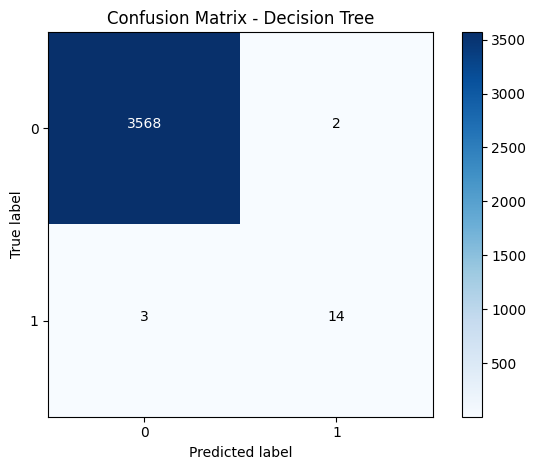

In [ ]:
plot_confusion_matrix(confusion_matrix_dt, classes=[0, 1], title= "Confusion Matrix - Decision Tree")

Utilizes the plot_confusion_matrix function to plot the confusion matrix for the decision tree model. It specifies the confusion matrix (confusion_matrix_dt), assigns class labels [0, 1] to the classes, and sets the title of the plot as "Confusion Matrix - Decision Tree".

In [ ]:
# Plot confusion matrix for Random Forests

confusion_matrix_rf = confusion_matrix(test_Y, predictions_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

Confusion Matrix - Random Forest
[[3570    0]
 [   3   14]]


Calculates the confusion matrix for the random forest model by comparing the true labels (test_Y) with the predicted labels (predictions_rf). It then prints the confusion matrix and its corresponding values.

Confusion matrix, without normalization


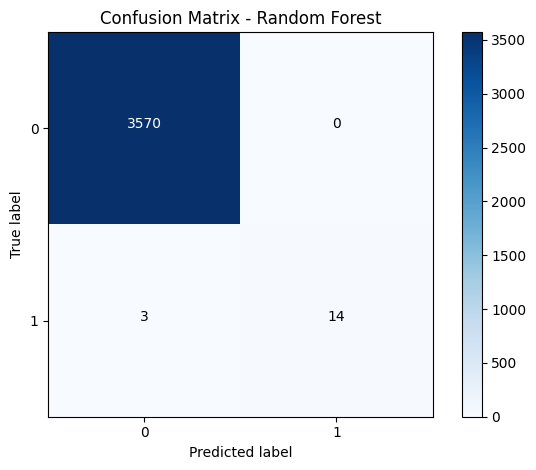

In [ ]:
plot_confusion_matrix(confusion_matrix_rf, classes=[0, 1], title= "Confusion Matrix - Random Forest")

Utilizes the plot_confusion_matrix function to plot the confusion matrix for the random forest model. It specifies the confusion matrix (confusion_matrix_rf), assigns class labels [0, 1] to the classes, and sets the title of the plot as "Confusion Matrix - Random Forest".

In [ ]:
# The below function prints the following necesary metrics

def metrics(actuals, predictions):
    print("Accuracy: {:.5f}".format(accuracy_score(actuals, predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals, predictions)))
    print("Recall: {:.5f}".format(recall_score(actuals, predictions)))
    print("F1-score: {:.5f}".format(f1_score(actuals, predictions)))  

The provided metrics function calculates and prints various evaluation metrics for a given set of actual labels (actuals) and predicted labels (predictions). It displays the accuracy, precision, recall, and F1-score, providing a comprehensive assessment of the model's performance.

In [ ]:
print("Evaluation of Decision Tree Model")
print()
metrics(test_Y, predictions_dt.round())

Evaluation of Decision Tree Model

Accuracy: 0.99861
Precision: 0.87500
Recall: 0.82353
F1-score: 0.84848


In [ ]:
print("Evaluation of Random Forest Model")
print()
metrics(test_Y, predictions_rf.round())

Evaluation of Random Forest Model

Accuracy: 0.99916
Precision: 1.00000
Recall: 0.82353
F1-score: 0.90323


**ENSEMBLE MODEL**

Ensemble Score:  99.91636465012546
Confusion Matrix - Ensemble
[[3570    0]
 [   3   14]]
Confusion matrix, without normalization
Evaluation of Ensemble Model

Accuracy: 0.99916
Precision: 1.00000
Recall: 0.82353
F1-score: 0.90323


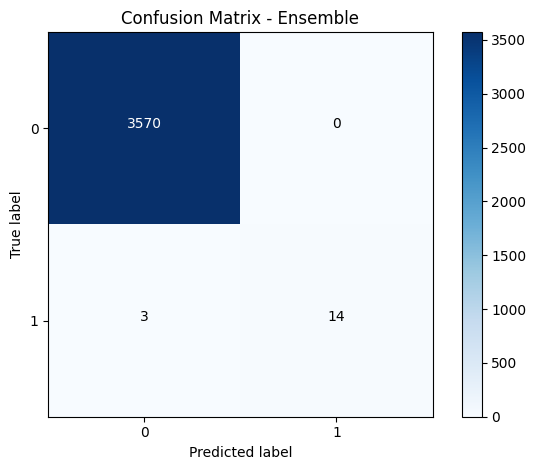

In [ ]:
from sklearn.ensemble import VotingClassifier

# Create the ensemble model
ensemble = VotingClassifier(estimators=[('dt', decision_tree), ('rf', random_forest)])

# Fit the ensemble model
ensemble.fit(train_X, train_Y)

# Predict with the ensemble model
predictions_ensemble = ensemble.predict(test_X)
ensemble_score = ensemble.score(test_X, test_Y) * 100

# Print the score of the ensemble model
print("Ensemble Score: ", ensemble_score)

# Compute and print the confusion matrix of the ensemble model
confusion_matrix_ensemble = confusion_matrix(test_Y, predictions_ensemble.round())
print("Confusion Matrix - Ensemble")
print(confusion_matrix_ensemble)

# Plot the confusion matrix of the ensemble model
plot_confusion_matrix(confusion_matrix_ensemble, classes=[0, 1], title="Confusion Matrix - Ensemble")

# Evaluate the performance of the ensemble model
print("Evaluation of Ensemble Model")
print()
metrics(test_Y, predictions_ensemble.round())


Creates an ensemble model using a VotingClassifier that combines a Decision Tree and Random Forest model. It then fits the ensemble model, predicts on the test data, and computes the accuracy score, confusion matrix, and evaluation metrics (accuracy, precision, recall, F1-score) for the ensemble model.

**MODEL EVALUATION**

Confusion matrix, without normalization
Confusion matrix, without normalization
Confusion matrix, without normalization


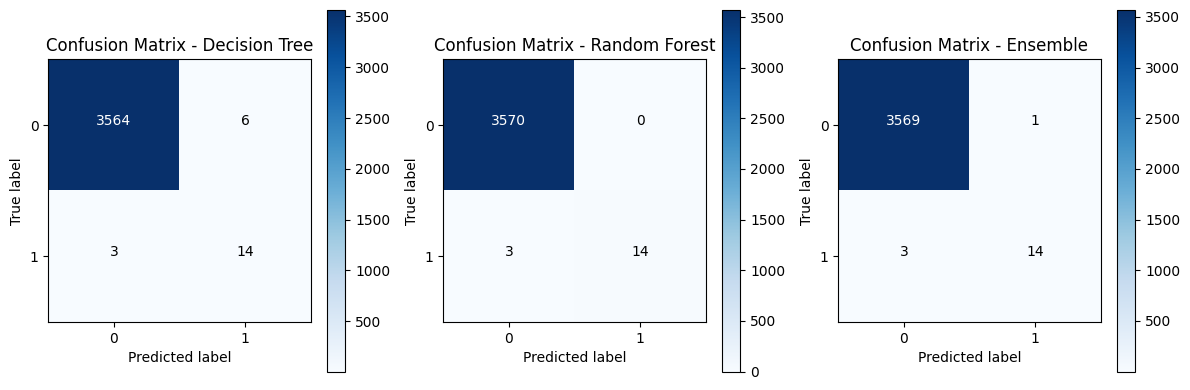

Evaluation of Decision Tree Model
Accuracy: 0.99749
Precision: 0.70000
Recall: 0.82353
F1-score: 0.75676
Evaluation of Random Forest Model
Accuracy: 0.99916
Precision: 1.00000
Recall: 0.82353
F1-score: 0.90323
Evaluation of Ensemble Model
Accuracy: 0.99888
Precision: 0.93333
Recall: 0.82353
F1-score: 0.87500


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

# Decision Tree Classifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_X, train_Y)

predictions_dt = decision_tree.predict(test_X)
decision_tree_score = decision_tree.score(test_X, test_Y) * 100

# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train_X, train_Y)

predictions_rf = random_forest.predict(test_X)
random_forest_score = random_forest.score(test_X, test_Y) * 100

# Create the ensemble model
ensemble = VotingClassifier(estimators=[('dt', decision_tree), ('rf', random_forest)])
ensemble.fit(train_X, train_Y)

# Predict with the ensemble model
predictions_ensemble = ensemble.predict(test_X)
ensemble_score = ensemble.score(test_X, test_Y) * 100

# Compute confusion matrices
confusion_matrix_dt = confusion_matrix(test_Y, predictions_dt.round())
confusion_matrix_rf = confusion_matrix(test_Y, predictions_rf.round())
confusion_matrix_ensemble = confusion_matrix(test_Y, predictions_ensemble.round())

# Plot confusion matrices
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Plot confusion matrices for each model
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plot_confusion_matrix(confusion_matrix_dt, classes=[0, 1], title="Confusion Matrix - Decision Tree")

plt.subplot(1, 3, 2)
plot_confusion_matrix(confusion_matrix_rf, classes=[0, 1], title="Confusion Matrix - Random Forest")

plt.subplot(1, 3, 3)
plot_confusion_matrix(confusion_matrix_ensemble, classes=[0, 1], title="Confusion Matrix - Ensemble")

plt.tight_layout()
plt.show()

# Evaluate the performance of each model
print("Evaluation of Decision Tree Model")
metrics(test_Y, predictions_dt.round())

print("Evaluation of Random Forest Model")
metrics(test_Y, predictions_rf.round())

print("Evaluation of Ensemble Model")
metrics(test_Y, predictions_ensemble.round())


ACCURACY COMAPARISON

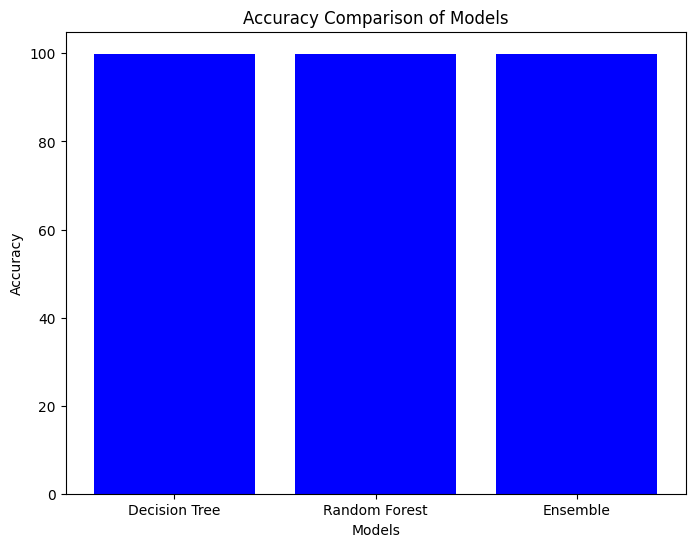

In [ ]:
import matplotlib.pyplot as plt

# Calculate accuracy for each model
accuracies = [decision_tree_score, random_forest_score, ensemble_score]

# Create labels for the models
labels = ['Decision Tree', 'Random Forest', 'Ensemble']

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.bar(labels, accuracies, color='blue')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Models')

# Display the plot
plt.show()


PRECISION COMPARISON

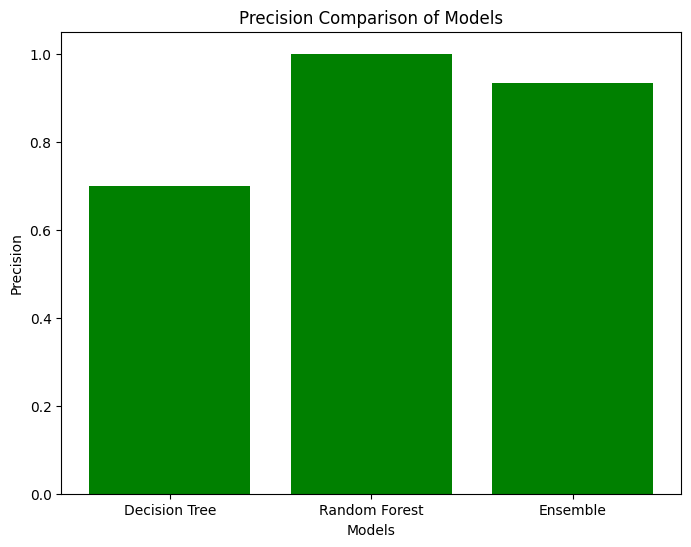

In [ ]:
import matplotlib.pyplot as plt

# Calculate precision for each model
precisions = [precision_score(test_Y, predictions_dt.round()), 
              precision_score(test_Y, predictions_rf.round()), 
              precision_score(test_Y, predictions_ensemble.round())]

# Create labels for the models
labels = ['Decision Tree', 'Random Forest', 'Ensemble']

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.bar(labels, precisions, color='green')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Precision')
plt.title('Precision Comparison of Models')

# Display the plot
plt.show()


RECALL VALUE COMPARISON

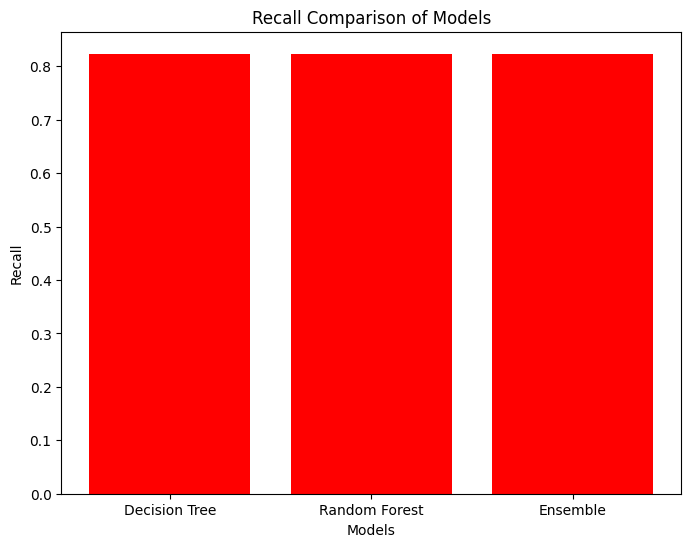

In [ ]:
import matplotlib.pyplot as plt

# Calculate recall for each model
recalls = [recall_score(test_Y, predictions_dt.round()), 
           recall_score(test_Y, predictions_rf.round()), 
           recall_score(test_Y, predictions_ensemble.round())]

# Create labels for the models
labels = ['Decision Tree', 'Random Forest', 'Ensemble']

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.bar(labels, recalls, color='red')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Recall')
plt.title('Recall Comparison of Models')

# Display the plot
plt.show()


F1 SCORE COMPARISON

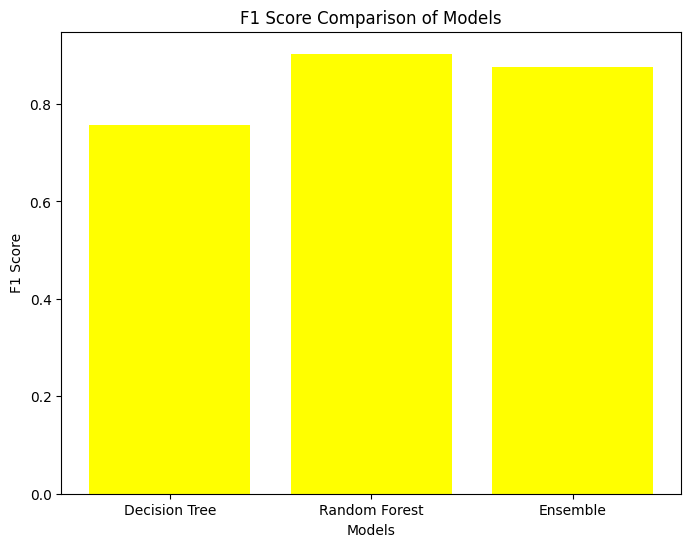

In [ ]:
import matplotlib.pyplot as plt

# Calculate F1 score for each model
f1_scores = [f1_score(test_Y, predictions_dt.round()), 
             f1_score(test_Y, predictions_rf.round()), 
             f1_score(test_Y, predictions_ensemble.round())]

# Create labels for the models
labels = ['Decision Tree', 'Random Forest', 'Ensemble']

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.bar(labels, f1_scores, color='yellow')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison of Models')

# Display the plot
plt.show()
